In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [24]:
df = pd.read_csv("User_Data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,19,19000,No
1,15810944,M,35,20000,No
2,15668575,F,26,43000,No
3,15603246,F,27,57000,No
4,15804002,M,19,76000,No


In [25]:
df = df.drop(columns = 'User ID')

In [26]:
print(df['Gender'].unique())
print(df['Gender'].mode())

[nan 'M' 'F' '@' '#' '%' '$']
0    F
Name: Gender, dtype: object


In [27]:
df['Gender'].value_counts()

Gender
F    163
M    157
#     20
$     18
%     15
@      9
Name: count, dtype: int64

In [28]:
df['Gender'] = df['Gender'].map({'@':'F', '#':'M', '$':'M', '%':'F', 'M':'M','F':'F'})
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df['Gender'] = df['Gender'].fillna(df['Gender'].median())

In [29]:
print(df['Age'].unique())
df['Age'] = df['Age'].replace(0, df['Age'].median())
print(df['Age'].unique())

[19 35 26 27 32 25 20 18  0 47 45 46 48 49 29 31 21 28 33 30 23 24 59 22
 34 39 38 37 42 36 40 41 58 55 52 60 56 53 50 51 57 43 54 44]
[19 35 26 27 32 25 20 18 36 47 45 46 48 49 29 31 21 28 33 30 23 24 59 22
 34 39 38 37 42 40 41 58 55 52 60 56 53 50 51 57 43 54 44]


In [30]:
df['Purchased'] = df['Purchased'].map({'No':0, 'Yes':1})
df['Purchased'].unique()

array([0, 1])

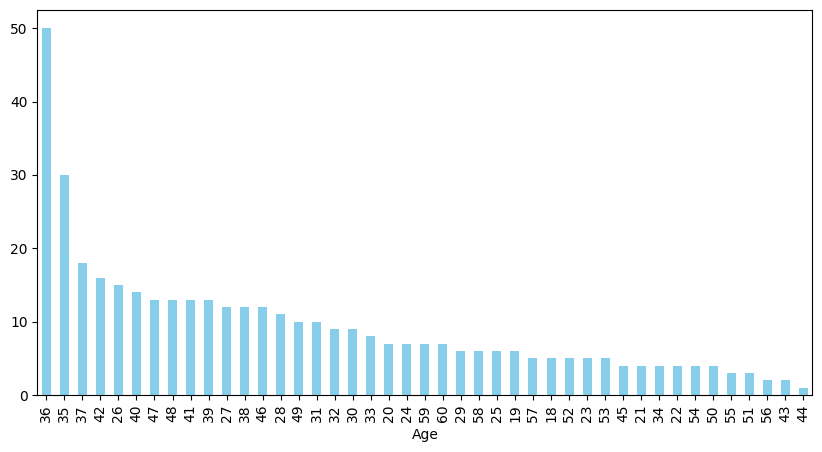

In [31]:
plot = df['Age'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')

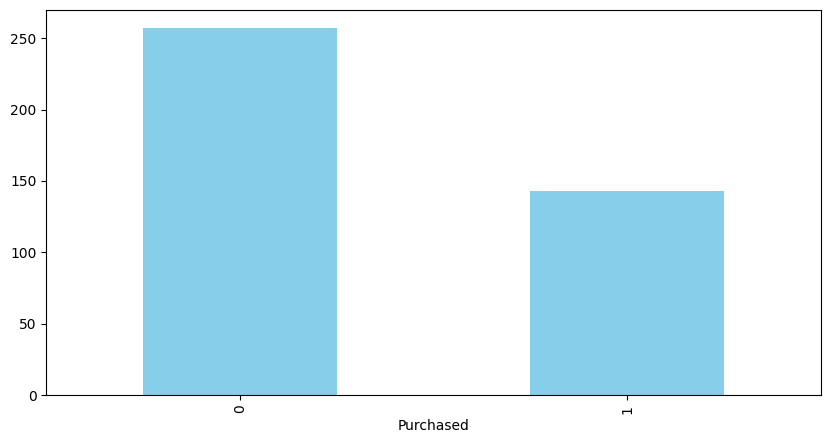

In [32]:
plot = df['Purchased'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')

In [33]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [34]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [35]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2
0,0.936981,-1.849748,-1.490046
1,0.936981,-0.267288,-1.460681
2,-1.067257,-1.157422,-0.785290
3,-1.067257,-1.058518,-0.374182
4,0.936981,-1.849748,0.183751


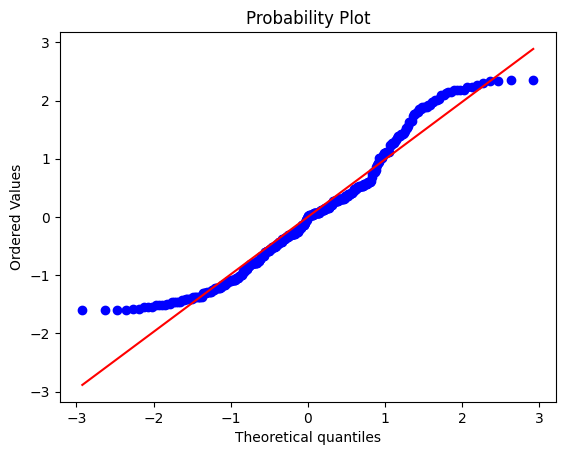

In [36]:
osm, osr = stats.probplot(X_scaled.iloc[:, 2], dist="norm", plot=plt)
plt.show()

In [37]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [38]:
def cost_function(y_preds, y):
    m = len(y)
    eps = 1e-9
    cost = (-1 / m) * np.sum(y * np.log(y_preds + eps) + (1 - y) * np.log(1 - y_preds + eps))
    return cost

In [39]:
m, n = X.shape
weights = np.zeros(n)
bias = 0
epochs = 1000
L = 0.1
costs = []

In [40]:
for i in range(epochs):
    z = np.dot(X_scaled, weights) + bias
    y_pred = sigmoid(z)
    dw = (1 / m) * np.dot(X_scaled.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    weights -= L * dw
    bias -= L * db
    cost =  cost_function(y_pred, y)
    costs.append(cost)
    if i%1000 ==0:
        print(f"The cost after {i} epochs: {cost}")

The cost after 0 epochs: 0.6931471785599453


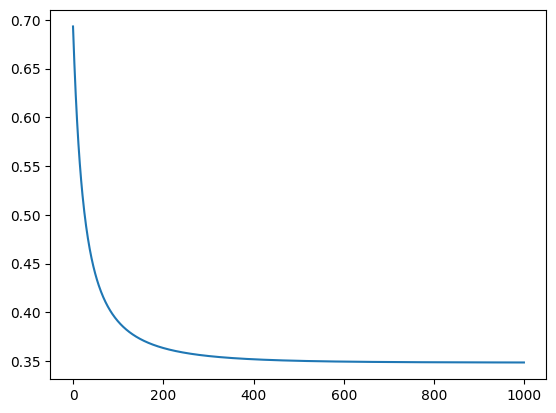

In [41]:
plt.plot(costs)
plt.show()

In [42]:
def predic(age, salary, gender):
    x_user = np.array([gender, age, salary])
    x_user = scalar.transform(x_user.reshape(1, -1))
    z = np.dot(x_user, weights) + bias
    y_pred = sigmoid(z)
    return y_pred[0]

In [43]:
age = int(input('Enter age: '))
sal = int(input('Enter estimated salary: '))
gender = int(input('Enter gender (0 for F, 1 for M): '))
result = predic(age, sal, gender)
print('Predicted Purchased:', int(result > 0.5))

Predicted Purchased: 0


c:\Users\vihaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [46]:
print(accuracy)

0.8875
